Extracting the File:

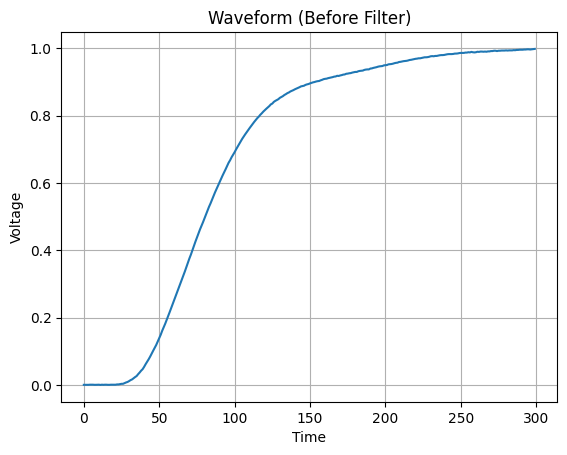

In [246]:
#Plot for given waveform (coeff.npy):
import numpy as np
import matplotlib.pyplot as plt

#given waveform:
coeff = np.load('coeff.npy') #array of values: measured step responce of old output stage

#plot:
plt.plot(coeff)
plt.title('Waveform (Before Filter)')
plt.xlabel('Time') #span 17.5 μs in total
plt.ylabel('Voltage')
plt.grid(True)
plt.show()

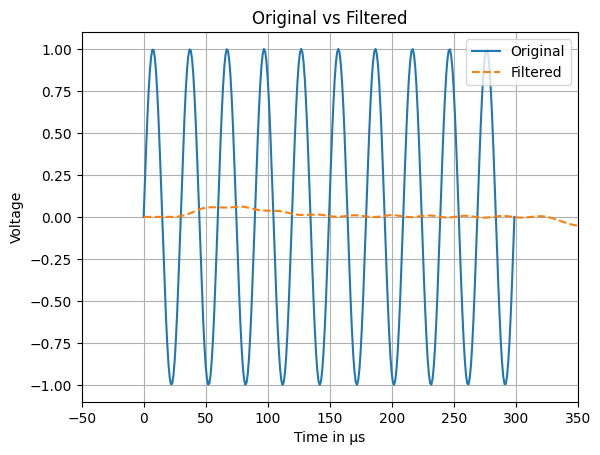

Peak amplitude of original signal is:  0.9999862004036565 
 Peak amplitude of filtered signal:  0.06162129248212755 
 Amplitude attenuation is: -24.205264072788772


In [250]:
t = np.linspace(0, 1, 300)
pre_coeff = np.where(t > 0, 1.0, 0.0)
square_wave = np.where(t > 0.5, 1.0, 0.0)
sine_wave = np.sin(2 * np.pi * 10 * t)
ramp_wave = t

input_waveform = sine_wave #choose the waveform
# print(FilterSimulation().math(input_waveform))
output_waveform = FilterSimulation().plotting(input_waveform)
FilterMath().transfer_function(input_waveform)

Imports:

In [365]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq, ifft

Function for Filter Simulation:

In [368]:
class FilterSimulation():

    def filter(self):
        step_response = np.load('coeff.npy') # can be changed to a different filter hardware
        impulse_response = np.diff(step_response, prepend = 0)
        return impulse_response

    def convolution(self, waveform):
        impulse_response = self.filter() # step response = derivative of impulse response
        filtered_waveform = np.convolve(waveform, impulse_response, mode = 'full') # f(t) = h(t) * g(t)
        return filtered_waveform

    def plotting(self, original, filtered_uncompensated, unfiltered_precompensated, filtered_precompensated):
        plt.figure()
        plt.plot(original, label = 'Original')
        filtered_uncompensated = filtered_uncompensated # change
        plt.plot(filtered_uncompensated, label = 'Fnfiltered Uncompensated', linestyle = '--')
        unfiltered_precompensated = unfiltered_precompensated # change
        plt.plot(unfiltered_precompensated, label = 'Unfiltered Precompensated', linestyle = '--')
        filtered_precompensated = self.convolution(original)
        plt.plot(filtered_precompensated, label = 'Filtered Precompensated', linestyle = '--')
        plt.title('Filter Waveforms')
        plt.xlabel('Time in µs')
        plt.ylabel('Voltage')
        plt.grid(True)
        plt.xlim(-50, 350)
        plt.legend()
        plt.show()

Precompensation Mathematics:

In [372]:
class FilterMath():
    def transfer_function(signal, dt, cutoff_hz = 1000):
        N = len(signal) # number of samples in the input signal

        freqs = fftfreq(N, d = dt) # fft takes time domain --> frequency domain; returns array length N with corresponding frequencies
        omega = 2 * np.pi * freqs
        RC = 1 / (2 * np.pi * cutoff_hz)
        G = 1 / (1 + 1j * omega * RC)

        signal_fft = fft(signal)
        filtered_fft = signal_fft * G
        filtered_signal = np.real(ifft(filtered_fft))

        return filtered_signal

Use Case:

In [373]:
# f_t = original_wave
# f_w = fft(f_t)
# min_len = min(len(f_w), len(g_w))
# f_w = f_w[:min_len]
# g_w = g_w[:min_len]
# h_w = f_w / g_w
# h_t = ifft(h_w)
# precompensated_input = np.real(h_t)

t1 = np.linspace(0, 1, 1000) # starts at 0ms, ends at 1ms (1e-3s), 1000 samples
dt = 0.001 # 1 kHz sampling rate

# ramp = np.where(t1 > 0.5, 1.0, 0.0)
# ramp = np.sin(2 * np.pi * 1000 * t1)
ramp = t1 / max(t1)
filtered_ramp = FilterMath().transfer_function(ramp, dt, cutoff_hz = 1000)

# output_from_precomp = FilterSimulation().convolution(h_t)

plt.figure(figsize=(8, 4))
plt.plot(ramp, label='Original')
plt.plot(filtered_ramp, label='Precompensated Filtered', linestyle='--')
plt.title('Original vs Filtered')
plt.xlabel('Time in µs')
plt.ylabel('Voltage')
plt.grid(True)
plt.xlim(-10, 1010) # plt.xlim(-50, 1000)
plt.ylim(-1, 2)
plt.legend()
plt.show()

TypeError: FilterMath.transfer_function() got multiple values for argument 'cutoff_hz'

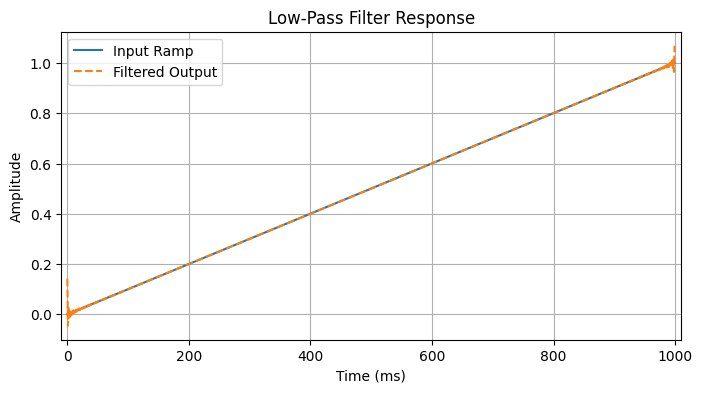

In [375]:
def lowpass_filter_v2(signal, dt, cutoff_hz = 1000):
    N = len(signal) # number of samples in the input signal

    freqs = fftfreq(N, d = dt) # fft takes time domain --> frequency domain; returns array length N with corresponding frequencies
    omega = 2 * np.pi * freqs
    RC = 1 / (2 * np.pi * cutoff_hz)
    G = 1 / (1 + 1j * omega * RC)

    signal_fft = fft(signal)
    filtered_fft = signal_fft * G
    filtered_signal = np.real(ifft(filtered_fft))

    return filtered_signal

t1 = np.linspace(0, 1, 1000)
dt = 0.001 # 1 kHz sampling rate

ramp = t1 / max(t1)
filtered_ramp = lowpass_filter_v2(ramp, dt, cutoff_hz = 1000)

plt.figure(figsize=(8, 4))
plt.plot(ramp, label="Input Ramp")
plt.plot(filtered_ramp, label="Filtered Output", linestyle = '--')
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")
plt.xlim(-10, 1010)
plt.title("Low-Pass Filter Response")
plt.legend()
plt.grid(True)
plt.show()